In [ ]:

import numpy as np  
import pandas as pd 


In [ ]:
df = pd.read_csv('startup_funding.csv')

df.head()

In [ ]:
df['Startup Name'].unique()

In [ ]:
df[df['Investors Name'].isna()]

In [ ]:
df['Investors Name'].unique()

In [ ]:
df.info()

In [ ]:
df.drop(columns=['Remarks'],inplace=True)

In [ ]:
df.set_index('Sr No',inplace = True)

In [ ]:
df.rename(columns = {
    'Date dd/mm/yyyy': 'date',
    'Startup Name':'startup',
    'Industry Vertical': 'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investor',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace = True)

In [ ]:
df['amount'] = df['amount'].fillna('0')
df['amount'] = df['amount'].str.replace(',','0')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')


In [ ]:
df = df[df['amount'].str.isdigit()]
# df = df[df['amount'].astype(str).str.isdigit()]
df

In [ ]:
df['amount'] = df['amount'].astype('float')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['amount'] = df['amount'].fillna('0')

df.info()

In [ ]:
# def to_inr(dollar):
#     inr = dollar * 87.24
#     return inr / 1e7  # Convert to INR Crores

# to_inr(2000000000)

In [ ]:
# df['amount'] = df['amount'].apply(to_inr) 

In [ ]:
df['amount'] = df['amount'] * 87.24 / 1e7


In [ ]:
df['amount']

In [ ]:
df.head(3)

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# df['date'] = pd.to_datetime(df["date"], errors='coerce')

In [ ]:
pd.to_datetime(df["date"])


In [ ]:
df[pd.to_datetime(df["date"]).isna()]

In [ ]:
 
df.info()


In [ ]:
df['date'].dt.month

In [ ]:
df = df.dropna(subset=['date','startup','vertical','city','investor','round','amount'])

In [ ]:
df.info()

In [ ]:
df.to_csv('startup_cleaned.csv',index=False)

In [ ]:
df['investor'].str.split(',').sum()

In [ ]:
sorted(set(df['investor'].str.split(',').sum()))

In [ ]:
df['investor']

In [ ]:
df.groupby('investor')['investor'].count().sort_values(ascending = False)['IDG Ventures']

In [ ]:
# df[df["investor"].str.contains("Ratan Tata")][['date','startup','vertical','city','round','amount']]
df[df["investor"].str.contains("IDG Ventures")][['date','startup','vertical','city','round','amount']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
big_df = df[df["investor"].str.contains("3one4 Capital")].groupby('startup')['amount'].sum().sort_values(ascending = False).head(5)
big_df

In [ ]:
df[df["investor"].str.contains("3one4 Capital")].groupby('vertical')['amount'].sum().plot(kind = 'pie')

In [ ]:
df['year'] = df['date'].dt.year
df
# df[df["investor"].str.contains("3one4 Capital")].groupby('year')['amount'].sum().plot(kind = 'pie')
df[df["investor"].str.contains("3one4 Capital")].groupby('year')['amount'].sum().plot()

In [ ]:
amount = round(df['amount'])
total = amount.sum()
max =  amount.max()
avg =  amount.mean()
amount 


In [ ]:

total, max, avg

In [ ]:
df.groupby('startup')['amount'].sum().sort_values(ascending = False)

In [ ]:
df.groupby('startup')['amount'].sum().mean(), df.groupby('startup')['amount'].mean().sum()

In [ ]:
df.groupby('startup')['amount'].max().sort_values(ascending = False)

In [ ]:

df['month'] = df['date'].dt.month
df['month']

In [ ]:
df.groupby(['year','month'])['startup'].count()

In [ ]:
df['startup'].nunique()

In [ ]:
df.groupby('startup')['amount'].count().sort_values(ascending =0)

In [ ]:
df.groupby('startup')['amount'].sum().max()

In [111]:
df.groupby(['year','month'])['startup'].count().reset_index()

,year,month,startup
0,2015,4,61
1,2015,5,55
2,2015,6,84
3,2015,7,85
4,2015,8,98
5,2015,9,87
6,2015,10,93
7,2015,11,90
8,2015,12,88
9,2016,1,104


In [116]:
t_df = df.groupby(['year','month'])['amount'].sum().reset_index()

In [117]:
t_df['x-axis'] = t_df['month'].astype('str') + '-' +t_df['year'].astype('str')
t_df['x-axis']

0      4-2015
1      5-2015
2      6-2015
3      7-2015
4      8-2015
5      9-2015
6     10-2015
7     11-2015
8     12-2015
9      1-2016
10     2-2016
11     3-2016
12     4-2016
13     5-2016
14     6-2016
15     7-2016
16     8-2016
17     9-2016
18    10-2016
19    11-2016
20    12-2016
21     1-2017
22     2-2017
23     3-2017
24     4-2017
25     5-2017
26     6-2017
27     7-2017
28     8-2017
29     9-2017
30    10-2017
31    11-2017
32    12-2017
33     1-2018
34     2-2018
35     3-2018
36     4-2018
37     5-2018
38     6-2018
39     7-2018
40     8-2018
41     9-2018
42    10-2018
43    11-2018
44    12-2018
45     1-2019
46     2-2019
47     4-2019
48     5-2019
49     6-2019
50     7-2019
51     8-2019
52     9-2019
53    10-2019
54    11-2019
55    12-2019
56     1-2020
Name: x-axis, dtype: object

In [119]:
max1 = df.groupby('startup')['amount'].sum().max()

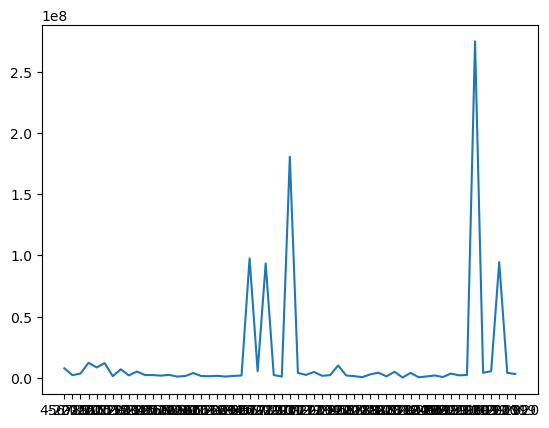

In [118]:
plt.plot(t_df['x-axis'],t_df['amount'])